## Линейные модели, SVM и деревья решений.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline 
sns.set(style="ticks")

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Кодирование категориальных признаков

Кодирование столбца пола<br>
Мужчина = 2<br>
Женщина = 1

In [3]:
ord_enc = OrdinalEncoder()
new_column = ord_enc.fit_transform(dataset[['Sex']])
dataset = dataset.drop(columns=['Sex'], axis=1)
dataset['Sex'] = new_column + 1
dataset['Sex'] = dataset['Sex'].astype(np.integer)

Удалим столбец имён

In [4]:
dataset = dataset.drop(columns=['Name'], axis=1)
dataset.head(5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
0,0,3,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,2


### Обучающая и тестовая выборки

In [5]:
data_train, data_test = train_test_split(dataset, test_size=0.33, random_state=42) #Автостопом по галактике :)
print('Размер выборки:', dataset.shape[0], 'x', dataset.shape[1])
print('Размер обучающей выборки:', data_train.shape[0], 'x', data_train.shape[1])

Размер выборки: 887 x 7
Размер обучающей выборки: 594 x 7


### Дерево решений

[Text(0.5, 0.875, 'x[0] <= 1.5\ngini = 0.473\nsamples = 594\nvalue = [366, 228]'),
 Text(0.3, 0.625, 'x[1] <= 2.5\ngini = 0.373\nsamples = 222\nvalue = [55, 167]'),
 Text(0.2, 0.375, 'x[1] <= 1.5\ngini = 0.062\nsamples = 125\nvalue = [4, 121]'),
 Text(0.1, 0.125, 'gini = 0.056\nsamples = 69\nvalue = [2, 67]'),
 Text(0.3, 0.125, 'gini = 0.069\nsamples = 56\nvalue = [2, 54]'),
 Text(0.4, 0.375, 'gini = 0.499\nsamples = 97\nvalue = [51, 46]'),
 Text(0.7, 0.625, 'x[1] <= 1.5\ngini = 0.274\nsamples = 372\nvalue = [311, 61]'),
 Text(0.6, 0.375, 'gini = 0.413\nsamples = 72\nvalue = [51, 21]'),
 Text(0.8, 0.375, 'x[1] <= 2.5\ngini = 0.231\nsamples = 300\nvalue = [260, 40]'),
 Text(0.7, 0.125, 'gini = 0.242\nsamples = 71\nvalue = [61, 10]'),
 Text(0.9, 0.125, 'gini = 0.228\nsamples = 229\nvalue = [199, 30]')]

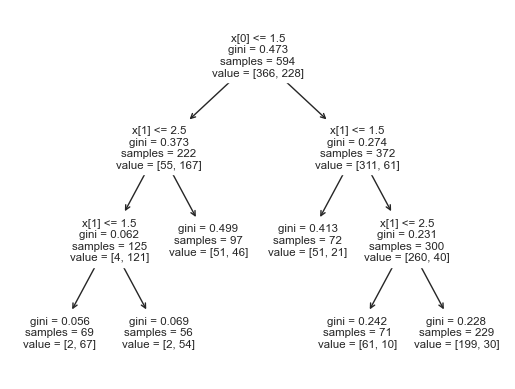

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_train[['Sex', 'Pclass']], data_train['Survived'])
clf.predict(data_test[['Sex', 'Pclass']])

tree.plot_tree(clf) 

### SVM

In [7]:
from sklearn.svm import SVC

X = data_train[['Sex', 'Pclass']]
y = data_train[['Survived']].values.ravel()
clf = SVC(C=1.0, kernel='linear').fit(X, y)
predict_survived = clf.predict(data_test[['Sex', 'Pclass']])
print(predict_survived)

[0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0]


C:\Users\ander\AppData\Local\Temp\ipykernel_6084\1088847022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_dataset['Survived'] = predict_survived


<AxesSubplot: xlabel='Sex', ylabel='Pclass'>

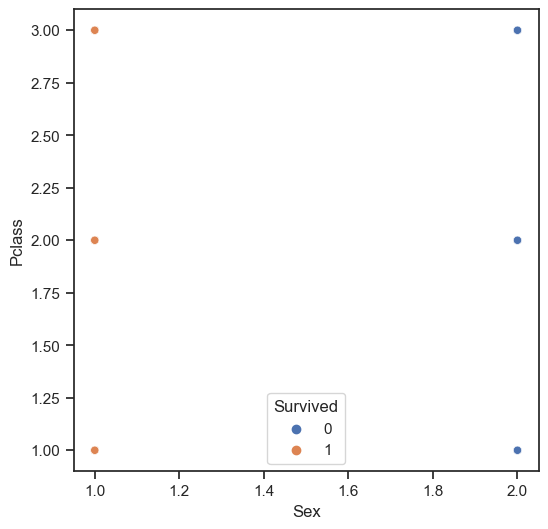

In [8]:
classified_dataset = data_test[['Sex', 'Pclass']]
classified_dataset['Survived'] = predict_survived
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x='Sex', y='Pclass', data=classified_dataset, hue='Survived')

In [9]:
sex = [1.0, 2.0]
survived_pclass1sex1 = classified_dataset.loc[(classified_dataset["Pclass"] == 1.0) & (classified_dataset["Sex"] == 1.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_pclass1sex2 = classified_dataset.loc[(classified_dataset["Pclass"] == 1.0) & (classified_dataset["Sex"] == 2.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_sex = [survived_pclass1sex1.shape[0], survived_pclass1sex2.shape[0]]

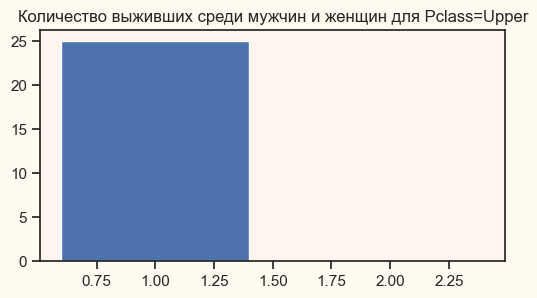

In [10]:
fig, ax = plt.subplots()

ax.bar(sex, survived_sex)

ax.set_facecolor('seashell')
ax.set_title('Количество выживших среди мужчин и женщин для Pclass=Upper')
fig.set_facecolor('floralwhite')
fig.set_figwidth(6)
fig.set_figheight(3) 

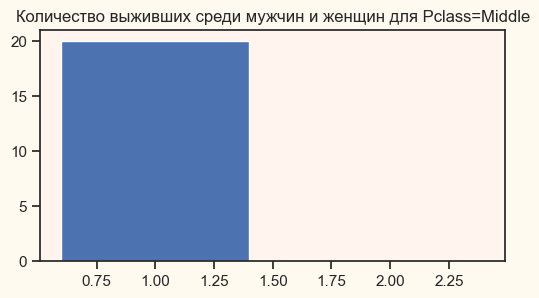

In [11]:
survived_pclass2sex1 = classified_dataset.loc[(classified_dataset["Pclass"] == 2.0) & (classified_dataset["Sex"] == 1.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_pclass2sex2 = classified_dataset.loc[(classified_dataset["Pclass"] == 2.0) & (classified_dataset["Sex"] == 2.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_sex = [survived_pclass2sex1.shape[0], survived_pclass2sex2.shape[0]]

fig, ax = plt.subplots()

ax.bar(sex, survived_sex)

ax.set_facecolor('seashell')
ax.set_title('Количество выживших среди мужчин и женщин для Pclass=Middle')
fig.set_facecolor('floralwhite')
fig.set_figwidth(6)
fig.set_figheight(3)

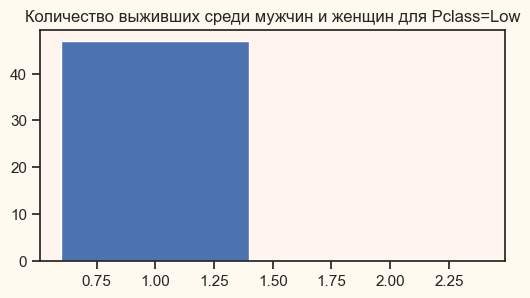

In [12]:
survived_pclass3sex1 = classified_dataset.loc[(classified_dataset["Pclass"] == 3.0) & (classified_dataset["Sex"] == 1.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_pclass3sex2 = classified_dataset.loc[(classified_dataset["Pclass"] == 3.0) & (classified_dataset["Sex"] == 2.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_sex = [survived_pclass3sex1.shape[0], survived_pclass3sex2.shape[0]]

fig, ax = plt.subplots()

ax.bar(sex, survived_sex)

ax.set_facecolor('seashell')
ax.set_title('Количество выживших среди мужчин и женщин для Pclass=Low')
fig.set_facecolor('floralwhite')
fig.set_figwidth(6)    #  ширина Figure
fig.set_figheight(3)    #  высота Figure

### Оценка модели SVM

In [13]:
from sklearn.metrics import confusion_matrix

y_true = data_test[['Survived']]
y_pred = predict_survived
mark = confusion_matrix(y_true, y_pred)
print('Число предсказаний из 0 (не спасён) в 0 (не спасён) =', mark[0][0])
print('Число предсказаний из 0 (не спасён) в 1 (спасён) =', mark[0][1])
print('Число предсказаний из 1 (спасён) в 0 (не спасён) =', mark[1][0])
print('Число предсказаний из 1 (спасён) в 1 (спасён) =', mark[1][1])

Число предсказаний из 0 (не спасён) в 0 (не спасён) = 153
Число предсказаний из 0 (не спасён) в 1 (спасён) = 26
Число предсказаний из 1 (спасён) в 0 (не спасён) = 48
Число предсказаний из 1 (спасён) в 1 (спасён) = 66


In [14]:
print('Процент правильных предсказаний =', (mark[0][0] + mark[1][1]) / data_test[['Survived']].shape[0] * 100)

Процент правильных предсказаний = 74.74402730375427
